In [1]:
import jax
import jax.numpy as jnp

from flax import linen as nn

import numpy as np
import matplotlib.pyplot as plt

import wavefunctions, trajectory, hamiltonian, optimization

import importlib

/home/amress/miniforge3/envs/nqs/lib/python3.9/site-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)
/home/amress/miniforge3/envs/nqs/lib/python3.9/site-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)


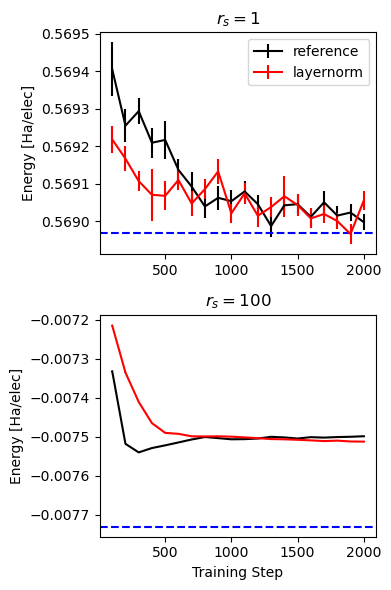

In [32]:
path = "LayerNorm/evaluations/rs{}_{}/statistics_{}.txt"
colors = ['black','red']
sota_energies = [0.568967,-0.00773018]

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(4,6))

for (i,r_ws) in enumerate([1,100]):
    
    for (j,networkType) in enumerate(["reference","layernorm"]):

        results = []
        
        for t in range(1,21):
            
            timestep = t * 100
            localResults = trajectory.getStatistics(
                path.format(r_ws, networkType, timestep)
            )
            
            if localResults[1] is None:
                results.append([timestep, localResults[0], np.nan])
            else:
                results.append([timestep, localResults[0], localResults[1]])
                
        results = np.array(results)

        axs[i].errorbar(
            results[:,0], results[:,1], yerr=results[:,2],
            color=colors[j], label=networkType
        )

    axs[i].axhline(y=sota_energies[i], color='blue', linestyle='--', label="SOTA")

axs[0].set_title(r"$r_s=1$")
axs[1].set_title(r"$r_s=100$")
axs[1].set_xlabel("Training Step")
axs[0].set_ylabel("Energy [Ha/elec]")
axs[1].set_ylabel("Energy [Ha/elec]")
axs[0].legend()

plt.tight_layout()
plt.show()